    ACCTAGE='Age of Oldest Account'
    DDA='Checking Account'
    DDABAL='Checking Balance'
    DEP='Checking Deposits'
    DEPAMT='Amount Deposited'
    CASHBK='Number Cash Back'
    CHECKS='Number of Checks'
    DIRDEP='Direct Deposit'
    NSF='Number Insufficient Fund'
    NSFAMT='Amount NSF'
    PHONE='Number Telephone Banking'
    TELLER='Teller Visits'
    ATM='ATM'
    ATMAMT='ATM Withdrawal Amount'
    POS='Number Point of Sale'
    POSAMT='Amount Point of Sale'
    CD='Certificate of Deposit'
    CDBAL='CD Balance'
    IRA='Retirement Account'
    IRABAL='IRA Balance'
    LOC='Line of Credit'
    LOCBAL='Line of Credit Balance'
    INV='Investment'
    INVBAL='Investment Balance'
    ILS='Installment Loan'
    ILSBAL='Loan Balance'
    MM='Money Market'
    MMBAL='Money Market Balance'
    MMCRED='Money Market Credits'
    MTG='Mortgage'
    MTGBAL='Mortgage Balance'
    SAV='Saving Account'
    SAVBAL='Saving Balance'
    CC='Credit Card'
    CCBAL='Credit Card Balance'
    CCPURC='Credit Card Purchases'
    SDB='Safety Deposit Box'
    INCOME='Income'
    HMOWN='Owns Home'
    LORES='Length of Residence'
    HMVAL='Home Value'
    AGE='Age'
    CRSCORE='Credit Score'
    MOVED='Recent Address Change'
    INAREA='Local Address'
    INS='Insurance Product'
    BRANCH='Branch of Bank'
    RES='Area Classification’

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# Import different model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# Save the model so that we can import it and use it later
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

Part 1: Cleaning

1.What is the size of each data frame? How many rows? How many columns?

In [2]:
df = pd.read_csv('data/cap_bank.csv')
df.head()


,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,...,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES
0,0.3,1,419.27,2,1170.06,0,0,0,0,0.0,...,1.0,11.0,89.0,63.0,696.0,0,1,1,B17,R
1,0.7,1,1986.81,1,446.93,0,1,1,0,0.0,...,1.0,7.0,87.0,51.0,674.0,0,1,0,B2,R
2,4.1,0,0.00,0,0.00,0,0,0,0,0.0,...,1.0,8.5,97.0,60.0,640.0,0,1,1,B3,S
3,0.5,1,1594.84,1,1144.24,0,1,0,0,0.0,...,1.0,7.5,145.0,44.0,672.0,0,1,0,B1,S
4,6.7,1,2813.45,2,1208.94,0,2,0,0,0.0,...,1.0,6.0,101.0,46.0,648.0,0,1,1,B1,S


In [3]:
df.shape

(32264, 48)

In [4]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  30194 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    28131 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      28131 non-null  float64
 17  POSAMT   28131 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

#### Check for duplicates

In [5]:
# Check row duplicates
df.duplicated().sum()

0

In [6]:
# Check column duplicates
df.transpose().duplicated()

ACCTAGE    False
DDA        False
DDABAL     False
DEP        False
DEPAMT     False
CASHBK     False
CHECKS     False
DIRDEP     False
NSF        False
NSFAMT     False
PHONE      False
TELLER     False
SAV        False
SAVBAL     False
ATM        False
ATMAMT     False
POS        False
POSAMT     False
CD         False
CDBAL      False
IRA        False
IRABAL     False
LOC        False
LOCBAL     False
INV        False
INVBAL     False
ILS        False
ILSBAL     False
MM         False
MMBAL      False
MMCRED     False
MTG        False
MTGBAL     False
CC         False
CCBAL      False
CCPURC     False
SDB        False
INCOME     False
HMOWN      False
LORES      False
HMVAL      False
AGE        False
CRSCORE    False
MOVED      False
INAREA     False
INS        False
BRANCH     False
RES        False
dtype: bool

#### Check for null values

In [7]:
# Check nulls in each column
df.isna().sum(axis=0) 

ACCTAGE    2070
DDA           0
DDABAL        0
DEP           0
DEPAMT        0
CASHBK        0
CHECKS        0
DIRDEP        0
NSF           0
NSFAMT        0
PHONE      4133
TELLER        0
SAV           0
SAVBAL        0
ATM           0
ATMAMT        0
POS        4133
POSAMT     4133
CD            0
CDBAL         0
IRA           0
IRABAL        0
LOC           0
LOCBAL        0
INV        4133
INVBAL     4133
ILS           0
ILSBAL        0
MM            0
MMBAL         0
MMCRED        0
MTG           0
MTGBAL        0
CC         4133
CCBAL      4133
CCPURC     4133
SDB           0
INCOME     5782
HMOWN      5533
LORES      5782
HMVAL      5782
AGE        6357
CRSCORE     707
MOVED         0
INAREA        0
INS           0
BRANCH        0
RES           0
dtype: int64

COLUMN: ACCTAGE
percent of nulls: 0.06415819489213985
COLUMN: PHONE
percent of nulls: 0.1280994297049343
COLUMN: POS
percent of nulls: 0.1280994297049343
COLUMN: INV
percent of nulls: 0.1280994297049343
COLUMN: INVBAL
percent of nulls: 0.1280994297049343
COLUMN: POSAMT
percent of nulls: 0.1280994297049343
COLUMN: CC
percent of nulls: 0.1280994297049343
COLUMN: CCBAL
percent of nulls: 0.1280994297049343
COLUMN: HMOWN
percent of nulls: 0.17149144557401438
COLUMN: CCPURC
percent of nulls: 0.1280994297049343
COLUMN: INCOME
percent of nulls: 0.17920902553930076
COLUMN: LORES
percent of nulls: 0.17920902553930076
COLUMN: HMVAL
percent of nulls: 0.17920902553930076
COLUMN: AGE
percent of nulls: 0.19703074634267295
COLUMN: CRSCORE
percent of nulls: 0.021912968013885446


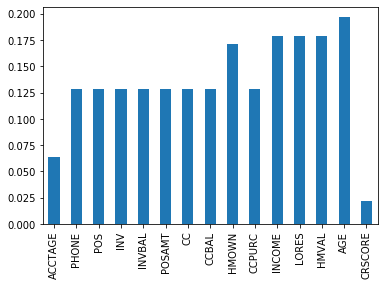

In [8]:
# Visualize percentage of nulls in each column
columns_with_null = ['ACCTAGE', 'PHONE', 'POS','INV','INVBAL','POSAMT', 'CC', 'CCBAL','HMOWN',
                    'CCPURC', 'INCOME', 'LORES', 'HMVAL', 'AGE','CRSCORE']

(df[columns_with_null].isna().sum() / len(df)).plot(kind='bar')


for col in columns_with_null:
    
    print('COLUMN:', col)
    print('percent of nulls:', df[col].isna().sum()/len(df)) 

### Columns containing missing values:

    ACCTAGE: Age of Oldest Account
    PHONE: Number of Telephone Bnaking
    POS: Number Point of Sale
    INV: Investment
    INVBAL: Investment Balance
    POSMAT: Amount Point of Sale
    CC: Credit Card
    CCBAL: Credit Card Balance
    HMOEN: Owns Home
    CCPURC: Credit Card Purchase
    INCOME: Income
    LORES: Length Of Residence
    HMVAL: Home Value
    AGE: Age
    CRSCORE: Credit Score

### Column-by-Column exploration and cleaning

In [18]:
columns_with_null = ['ACCTAGE', 'PHONE', 'POS','INV','INVBAL','POSAMT', 'CC', 'CCBAL','HMOWN',
                    'CCPURC', 'LORES', 'AGE','CRSCORE','HMVAL']

for col in columns_with_null:
    df[col].fillna(df[col].median(), inplace=True) # Impute null values with median

In [19]:
df.isna().sum(axis=0) 

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
INS        0
BRANCH     0
RES        0
dtype: int64

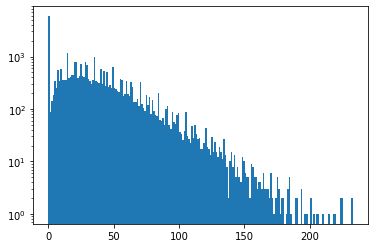

In [20]:
# Check the distribution of Income
plt.figure()
plt.hist(df['INCOME'], bins=200)
plt.yscale('log')
plt.show() 

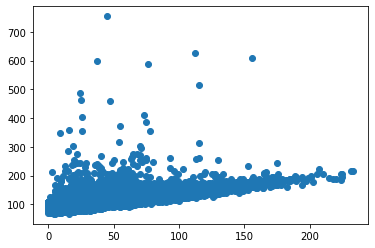

In [21]:
# Check the liner relationship between Income and Home Value. 
plt.figure()
plt.scatter(df['INCOME'],df['HMVAL']) 
plt.show()

The scatter plot shows these two variables do have positive correlation. So we will impute their null values based on their relative percentage values.

In [22]:
# Check INCOME as a proportion of HMVAL and get the median value
INC_pct = df['INCOME']/df['HMVAL'] 
INC_pct[np.isfinite(INC_pct)].median()  

0.2647058823529412

So based upon the above, we will impute INCOME that remain with ~0.319 * the HMVAL column.

In [23]:
# Impute the missing values of INCOME with the median of INC_pct
df.loc[df['INCOME'].isna(),'INCOME']=df.loc[df['INCOME'].isna(),'DDA']*0.319

In [24]:
# Check nulls in INCOME column. It shows we successfully impute the missing values in this column.
df['INCOME'].isna().sum(axis=0) 

0

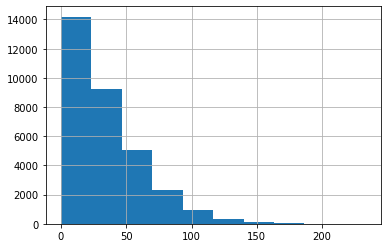

In [25]:
# Check the distribution of INCOME column again after imputation
df['INCOME'].hist()
#plt.yscale('log')

In [26]:
# Make sure there is no more nulls in each column 
df.isna().sum(axis=0) 

ACCTAGE    0
DDA        0
DDABAL     0
DEP        0
DEPAMT     0
CASHBK     0
CHECKS     0
DIRDEP     0
NSF        0
NSFAMT     0
PHONE      0
TELLER     0
SAV        0
SAVBAL     0
ATM        0
ATMAMT     0
POS        0
POSAMT     0
CD         0
CDBAL      0
IRA        0
IRABAL     0
LOC        0
LOCBAL     0
INV        0
INVBAL     0
ILS        0
ILSBAL     0
MM         0
MMBAL      0
MMCRED     0
MTG        0
MTGBAL     0
CC         0
CCBAL      0
CCPURC     0
SDB        0
INCOME     0
HMOWN      0
LORES      0
HMVAL      0
AGE        0
CRSCORE    0
MOVED      0
INAREA     0
INS        0
BRANCH     0
RES        0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32264 entries, 0 to 32263
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCTAGE  32264 non-null  float64
 1   DDA      32264 non-null  int64  
 2   DDABAL   32264 non-null  float64
 3   DEP      32264 non-null  int64  
 4   DEPAMT   32264 non-null  float64
 5   CASHBK   32264 non-null  int64  
 6   CHECKS   32264 non-null  int64  
 7   DIRDEP   32264 non-null  int64  
 8   NSF      32264 non-null  int64  
 9   NSFAMT   32264 non-null  float64
 10  PHONE    32264 non-null  float64
 11  TELLER   32264 non-null  int64  
 12  SAV      32264 non-null  int64  
 13  SAVBAL   32264 non-null  float64
 14  ATM      32264 non-null  int64  
 15  ATMAMT   32264 non-null  float64
 16  POS      32264 non-null  float64
 17  POSAMT   32264 non-null  float64
 18  CD       32264 non-null  int64  
 19  CDBAL    32264 non-null  int64  
 20  IRA      32264 non-null  int64  
 21  IRABAL   322

### Classification - Predict who is likely to accept campagin offers

#### Read the data with clustering labels

In [28]:
df = pd.read_csv('data/cap_bank.csv')
df.head()

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,...,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES
0,0.3,1,419.27,2,1170.06,0,0,0,0,0.0,...,1.0,11.0,89.0,63.0,696.0,0,1,1,B17,R
1,0.7,1,1986.81,1,446.93,0,1,1,0,0.0,...,1.0,7.0,87.0,51.0,674.0,0,1,0,B2,R
2,4.1,0,0.00,0,0.00,0,0,0,0,0.0,...,1.0,8.5,97.0,60.0,640.0,0,1,1,B3,S
3,0.5,1,1594.84,1,1144.24,0,1,0,0,0.0,...,1.0,7.5,145.0,44.0,672.0,0,1,0,B1,S
4,6.7,1,2813.45,2,1208.94,0,2,0,0,0.0,...,1.0,6.0,101.0,46.0,648.0,0,1,1,B1,S


The only two non-numeric columns are RES and BRANCH.

NameError: name 'avg' is not defined

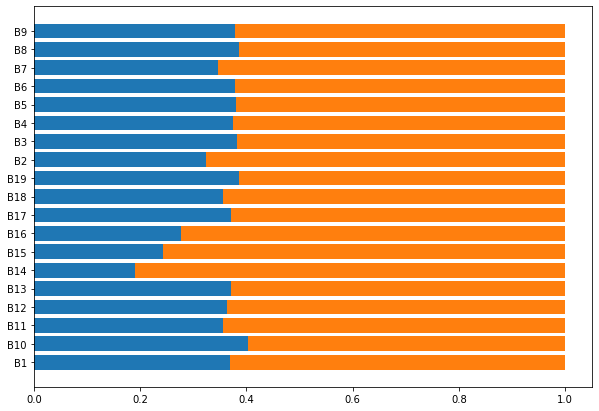

In [29]:
# Get count of INS for each BRANCH
totals = df.groupby('BRANCH')['INS'].count() # two columns are hierarchical
pos_counts = df.groupby('BRANCH')['INS'].sum()

# Use these to calculate the %-INS
pos_pcts = pos_counts / totals
neg_pcts = 1 - pos_pcts

# Plot these on a stacked bar chart
plt.figure(figsize=(10,7))
plt.barh(pos_pcts.index, pos_pcts.values, label='likelihood of buying INS')
plt.barh(neg_pcts.index, neg_pcts.values, label='likelihood of not buying INS',
        left=pos_pcts) # neg_pcts bars have their leftmost point where the pos_pcts end
plt.title(f'INS % by BRANCH (mean = {avg})')
plt.legend()
plt.show()

In [ ]:
# Check the distribution of BRANCH values
df['BRANCH'].value_counts().plot(kind='bar') 
plt.show()

display(df['BRANCH'].value_counts())

BRANCH has almost 20 imbalanced values. In this project, we don't care about which branch has the most powerful predictive power so we drop variable BRANCH. INS is the target variable, so we need to drop it since this is a clustering problem and we don't predict anything but try to find the underlying pattern of the data points.

In [ ]:
# dropping BRANCH and target variable INS
#df.drop(['BRANCH','INS'], axis=1, inplace=True)

Let's encode categorical variable RES with numeric labels.

In [30]:
# Check unique values of RES column
df['RES'].unique()

array(['R', 'S', 'U'], dtype=object)

In [31]:
# Replace values in the RES column with 1,2,3
df['RES'].replace({'R':1, 'S':2, 'U':3}, inplace=True)

In [32]:
# Check again
df['RES'].unique()

array([1, 2, 3])

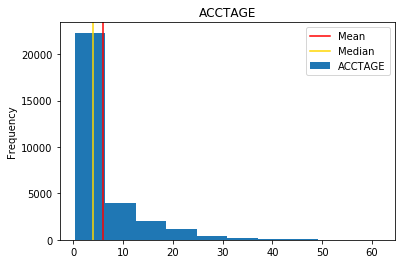

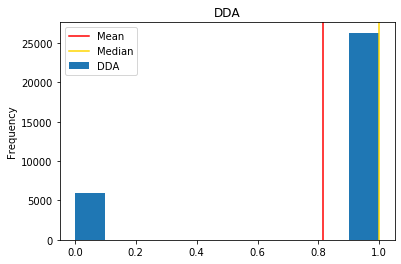

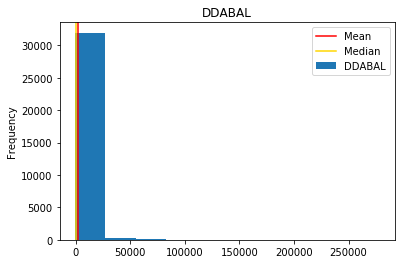

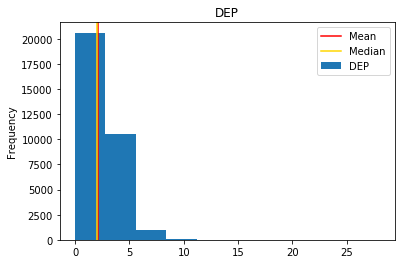

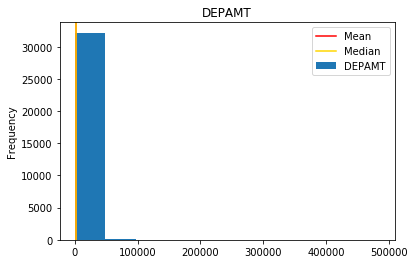

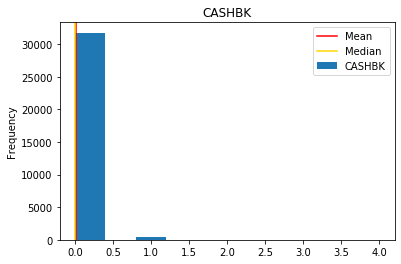

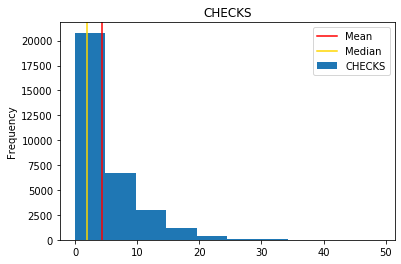

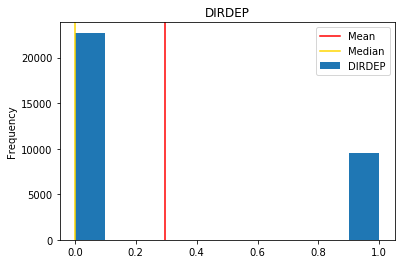

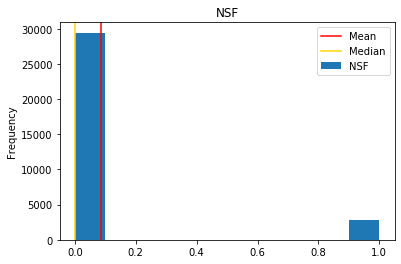

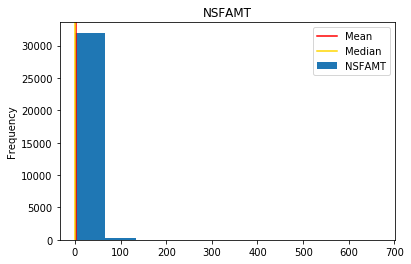

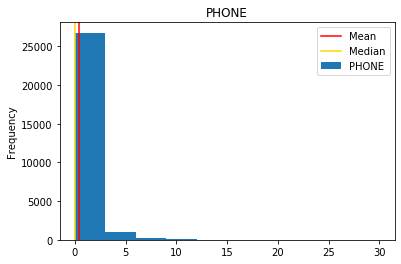

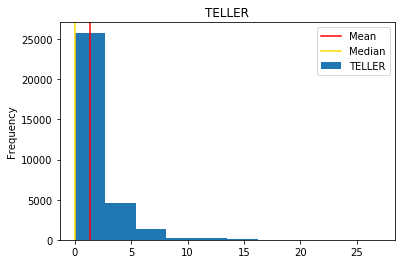

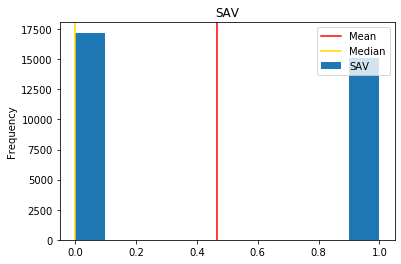

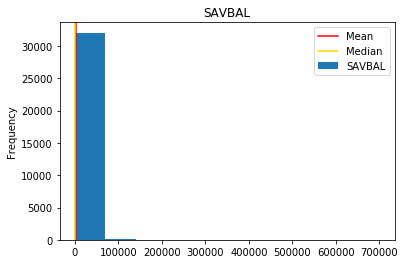

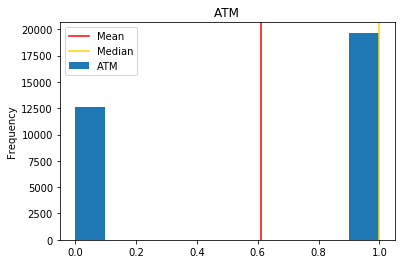

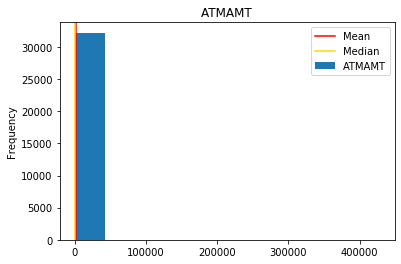

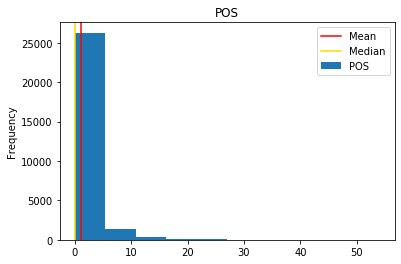

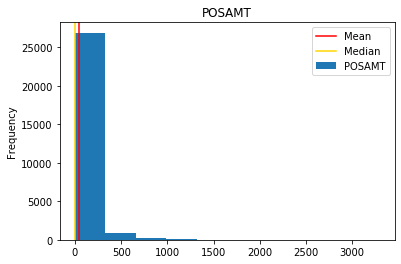

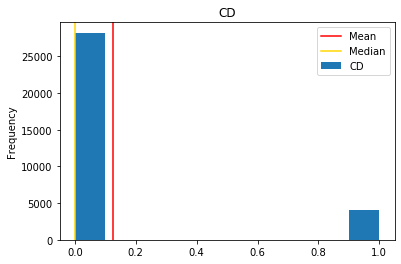

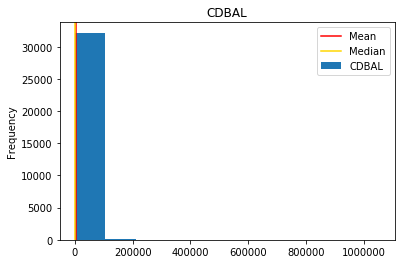

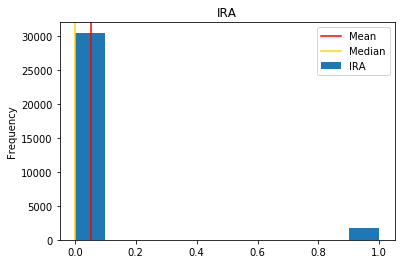

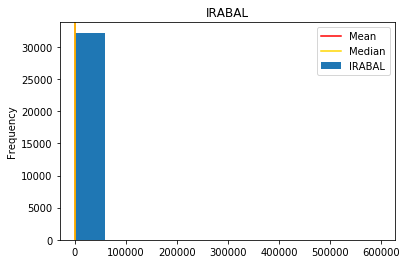

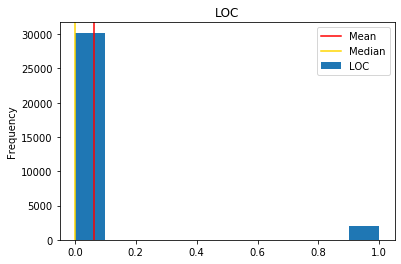

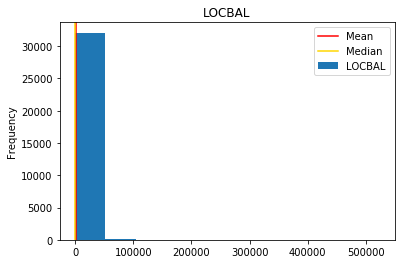

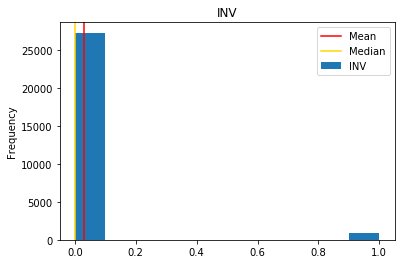

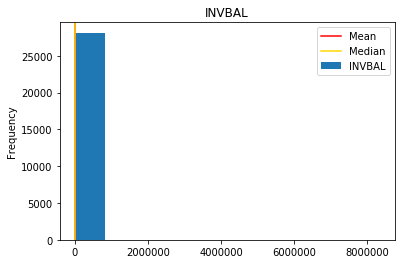

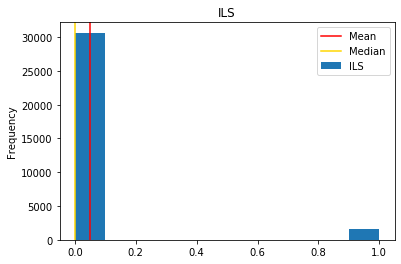

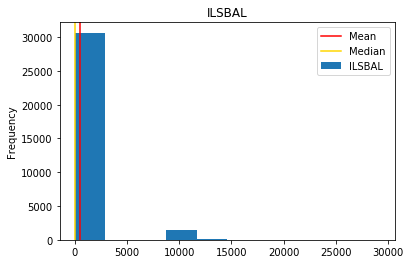

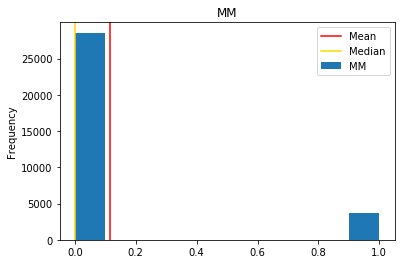

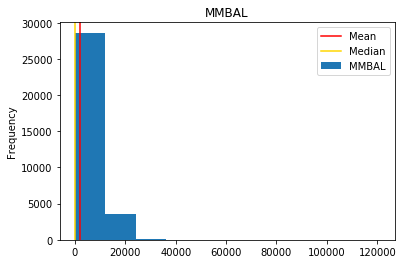

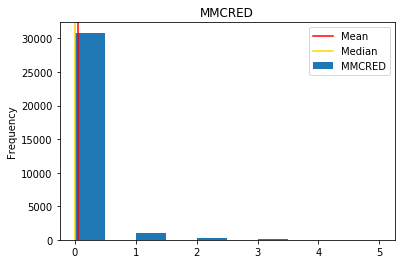

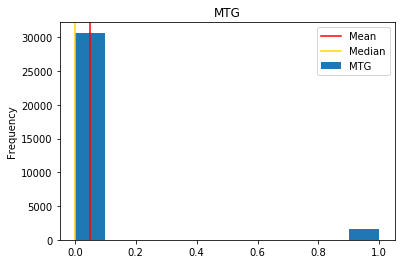

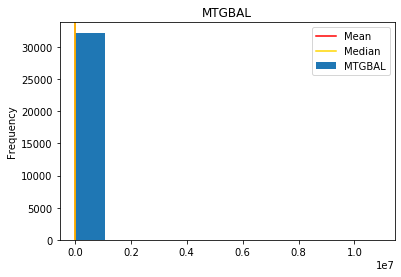

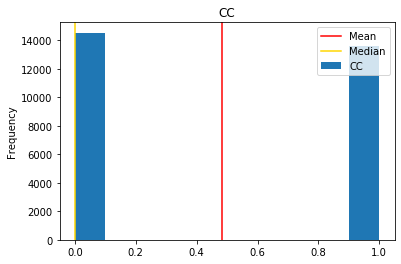

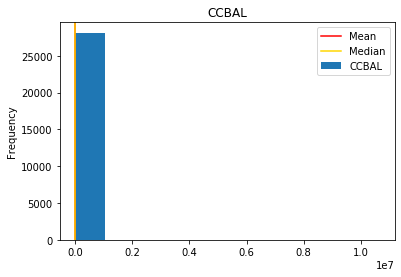

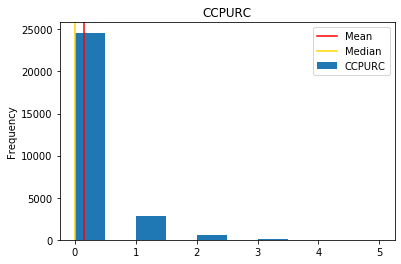

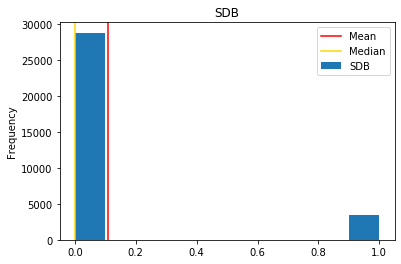

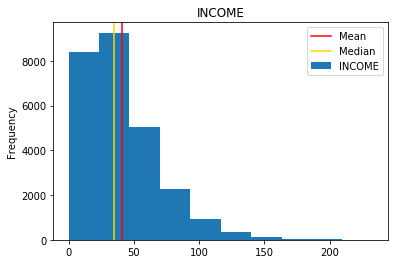

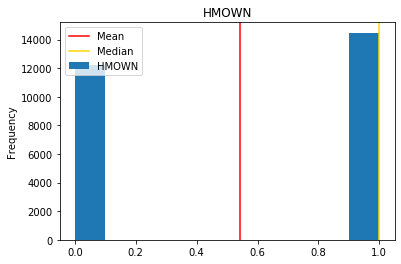

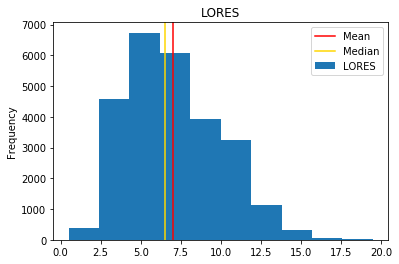

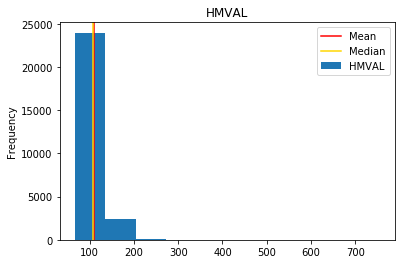

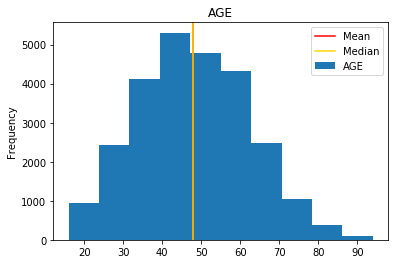

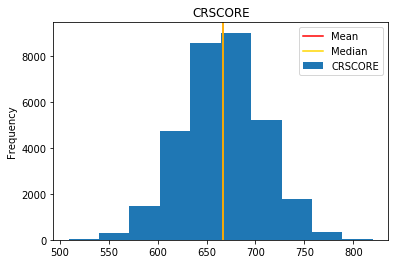

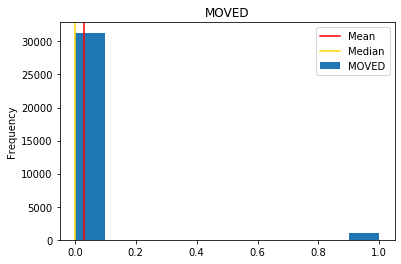

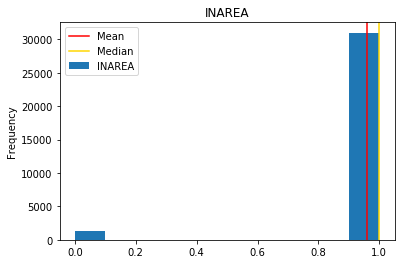

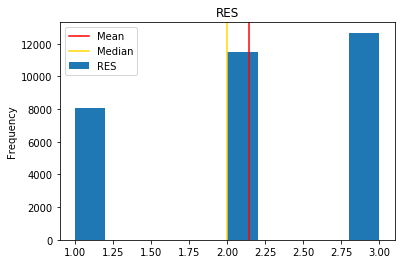

In [33]:
# Check distributions of all columns
num_columns = ['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
              'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
              'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
              'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
              'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
              'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA','RES']

for col in num_columns:
    df[col].plot(kind='hist')
    plt.axvline(df[col].mean(), c='r', label='Mean') 
    plt.axvline(df[col].median(), c='gold', label='Median')
    plt.title(col)
    plt.legend()
    plt.show()
    

Looking at the data we can see that the data that only a few of our numeric columns follow a normal distribution. This in itself is not a major issue for our modelling process. Usually having a normal distribution of features translates well to well behaved errors but its not a hard requirement.

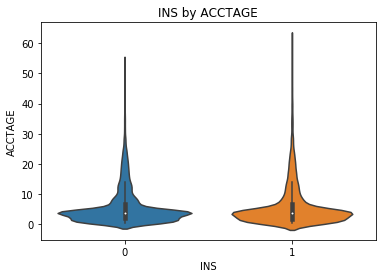

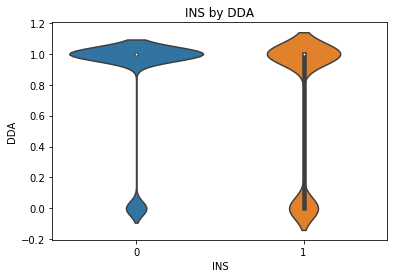

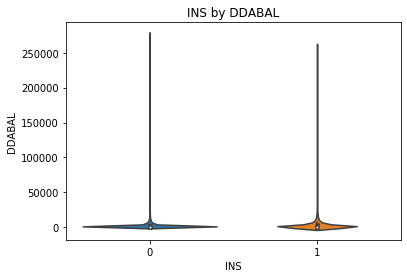

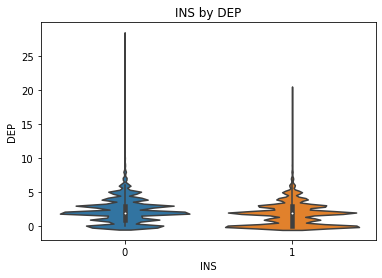

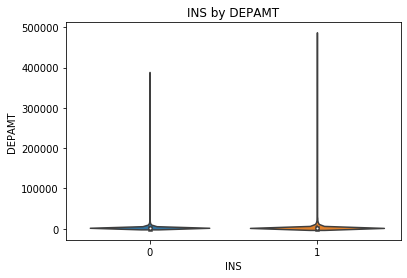

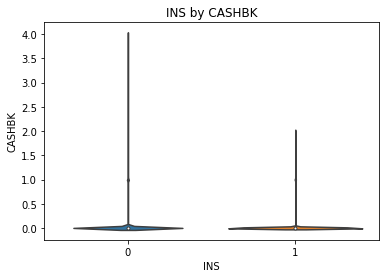

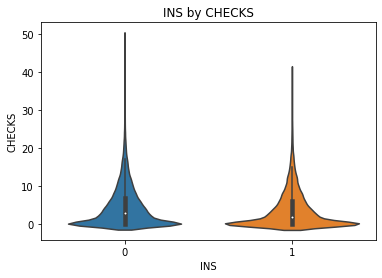

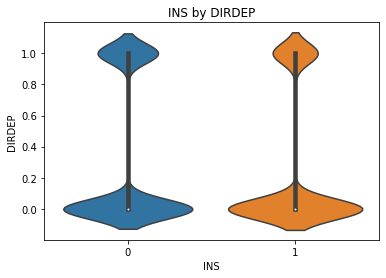

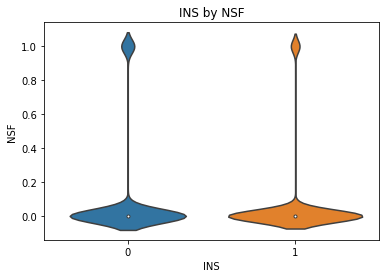

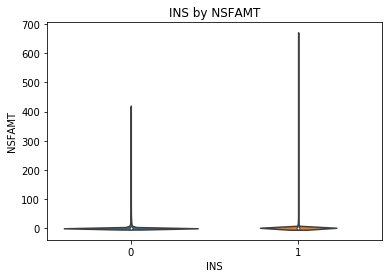

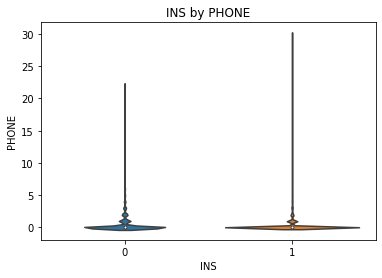

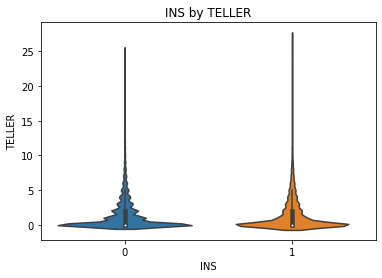

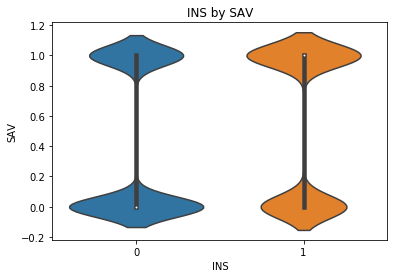

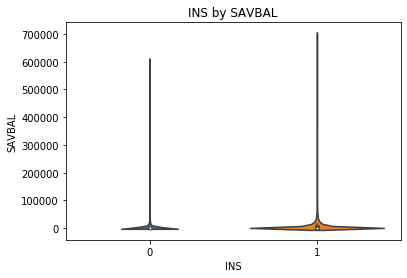

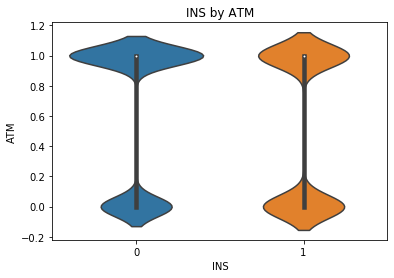

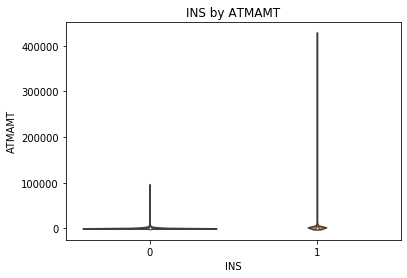

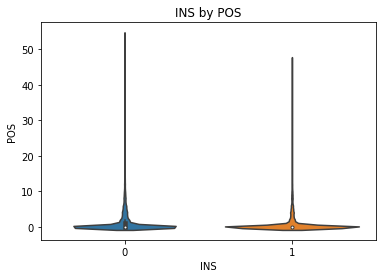

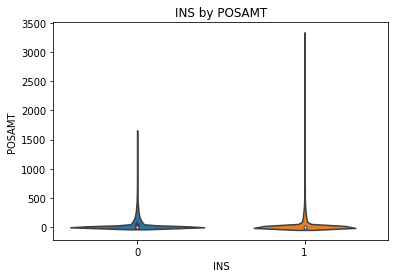

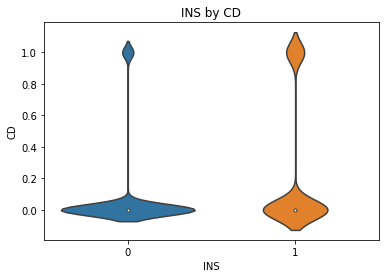

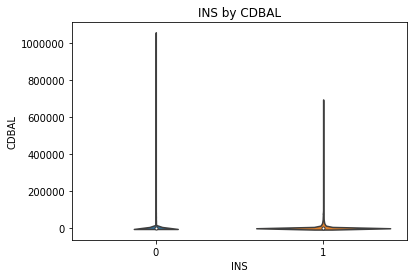

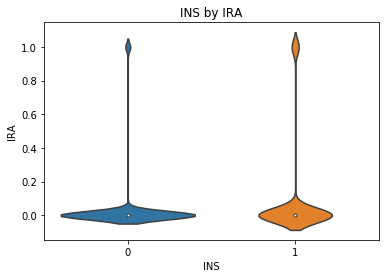

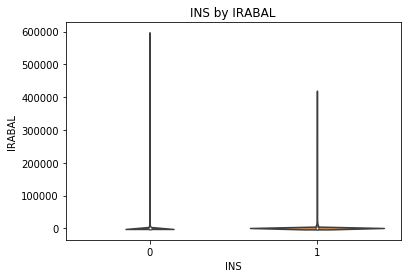

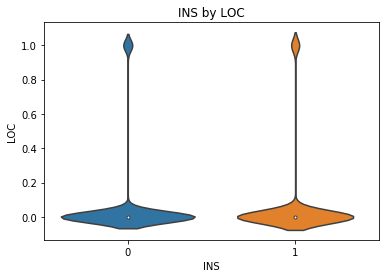

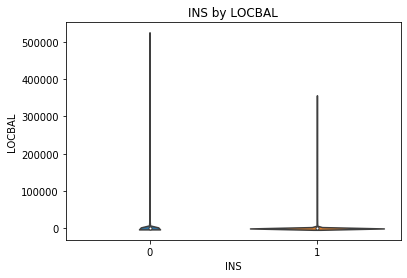

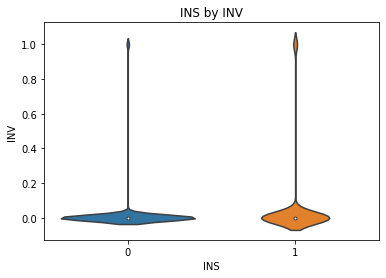

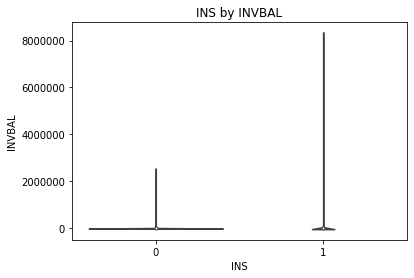

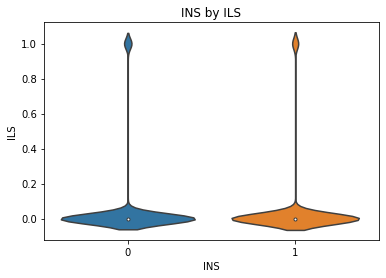

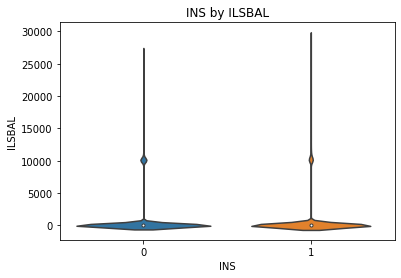

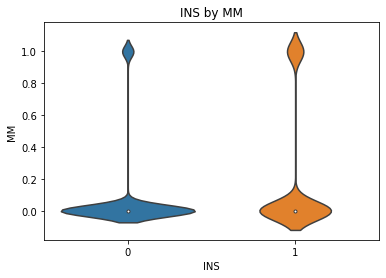

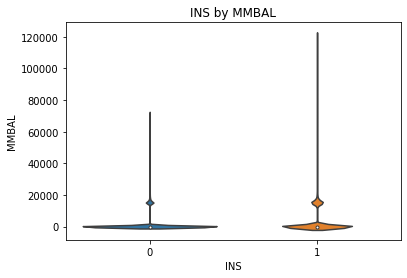

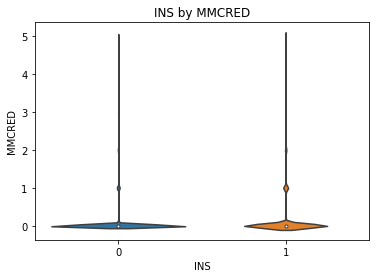

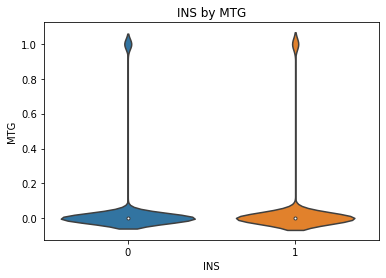

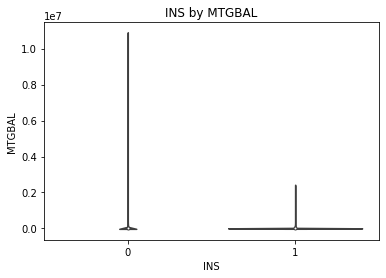

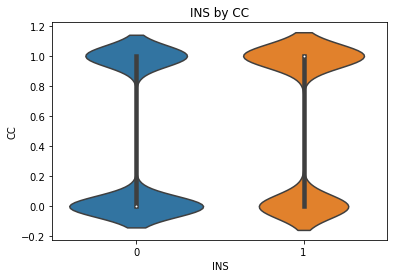

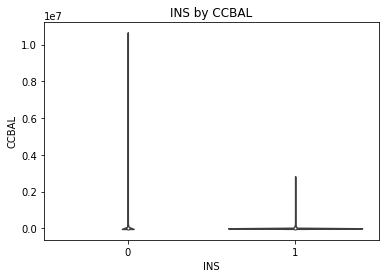

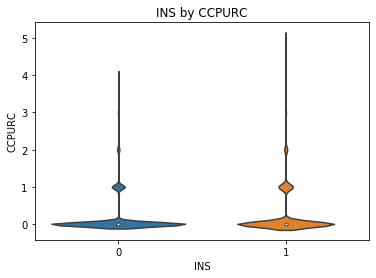

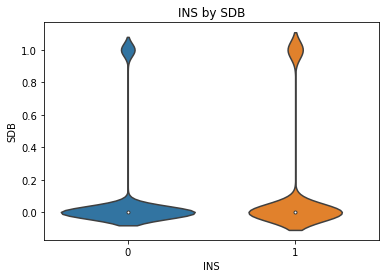

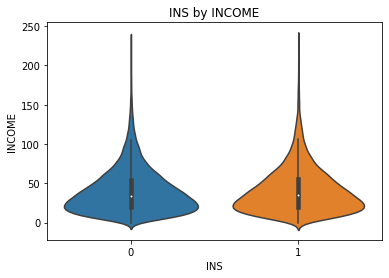

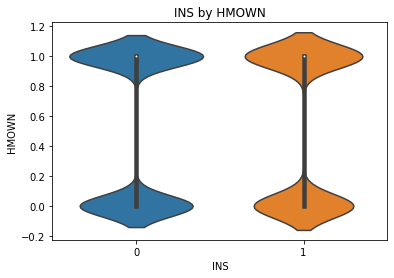

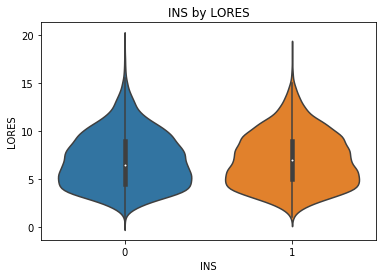

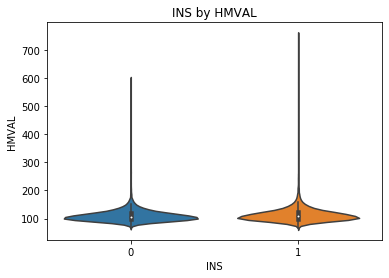

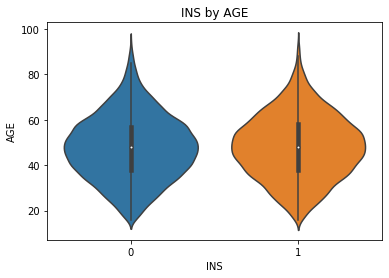

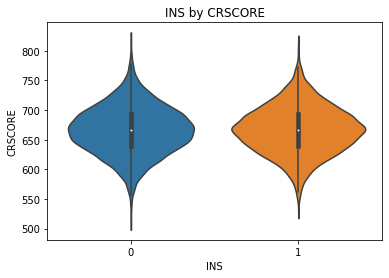

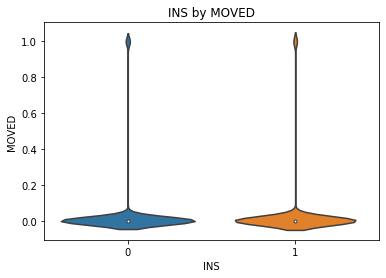

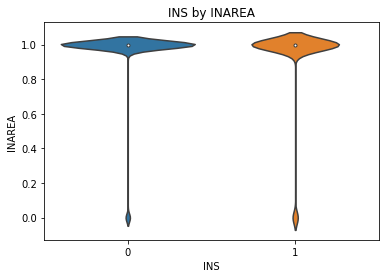

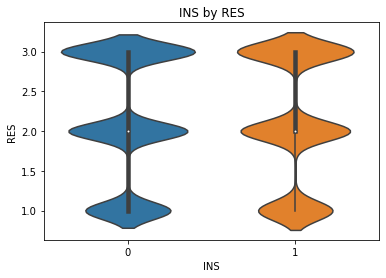

In [34]:
# Check 
num_columns = ['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA','RES']

for col in num_columns:
    
    sns.violinplot(y=col, x='INS', data=df)
    plt.title(f'INS by {col}')
    plt.show()
    

In [35]:

#for col in num_columns:

        # Check unique values of each column
        #unique_value = df[col].unique()
        #unique_value2 = pd.DataFrame(unique_value, columns=[col])
        #print(unique_value2)
        
       

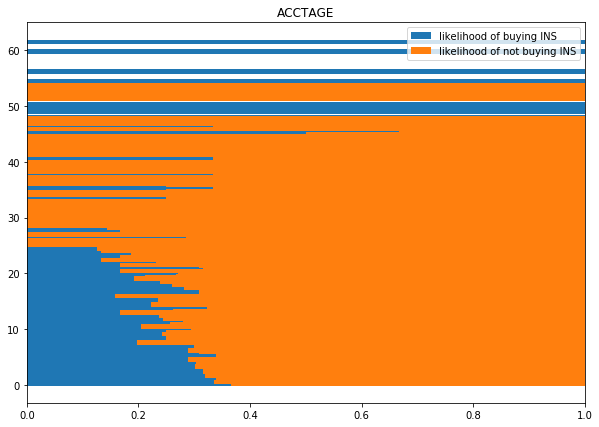

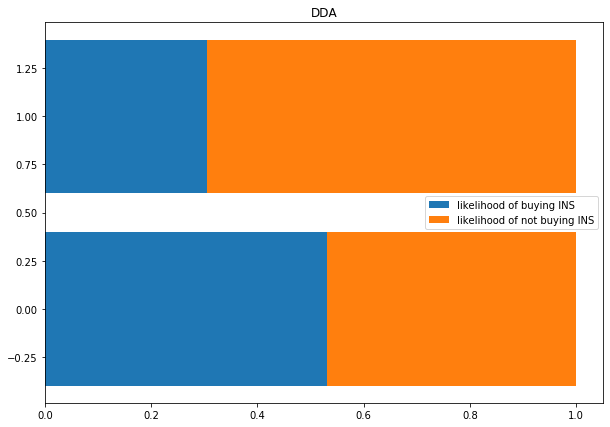

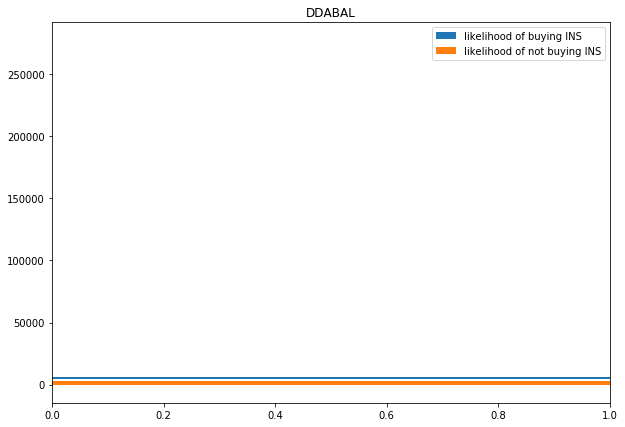

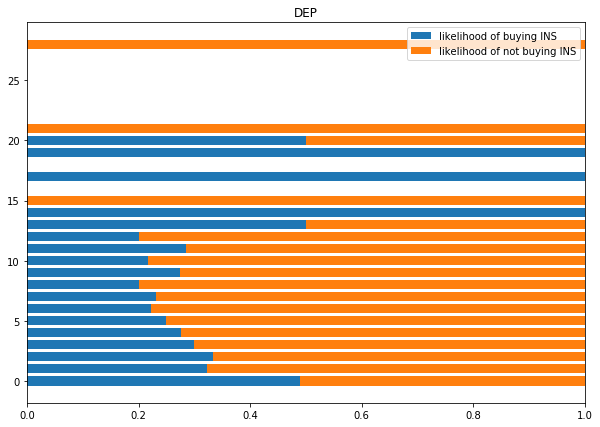

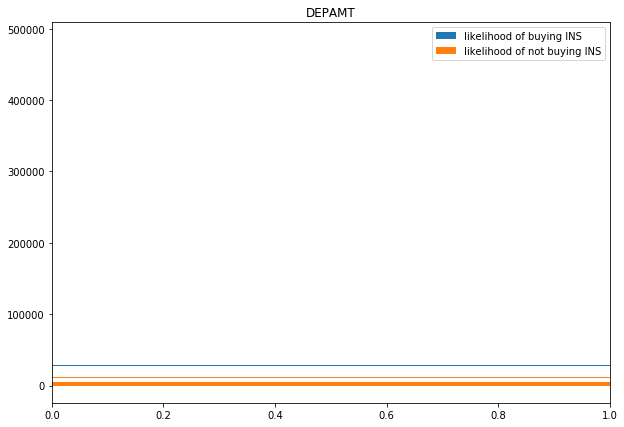

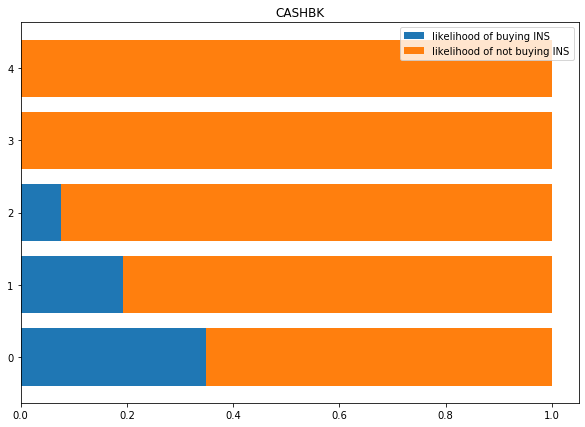

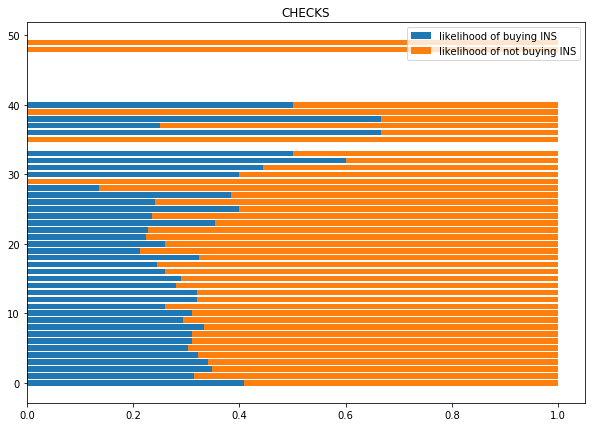

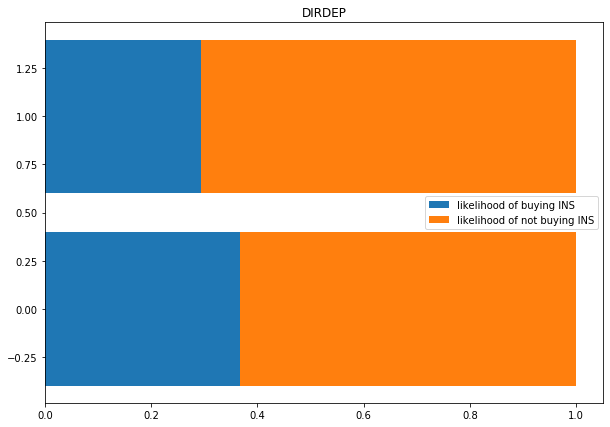

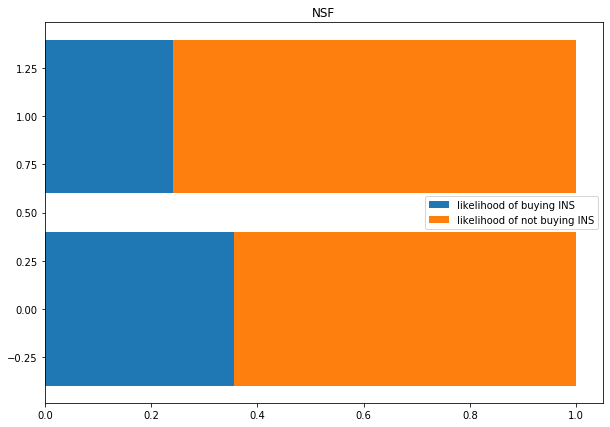

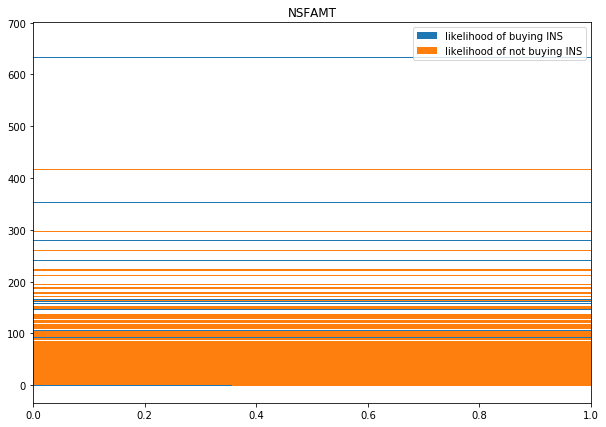

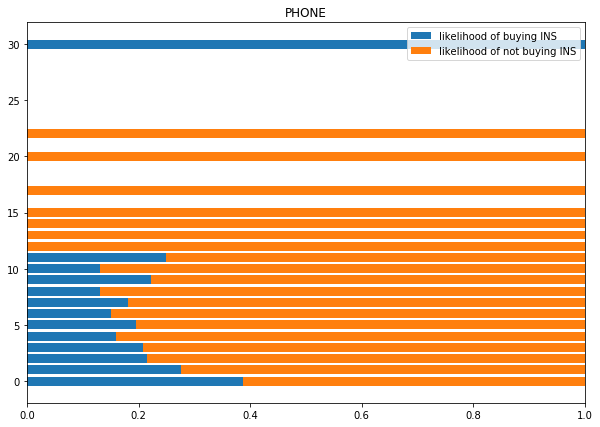

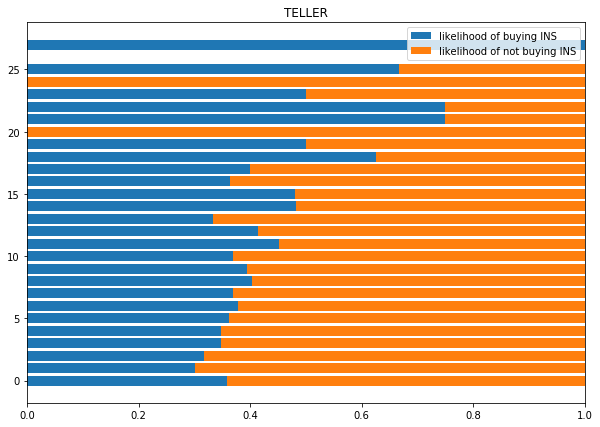

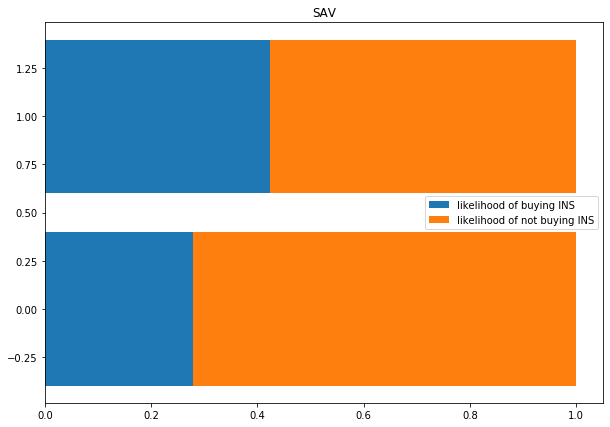

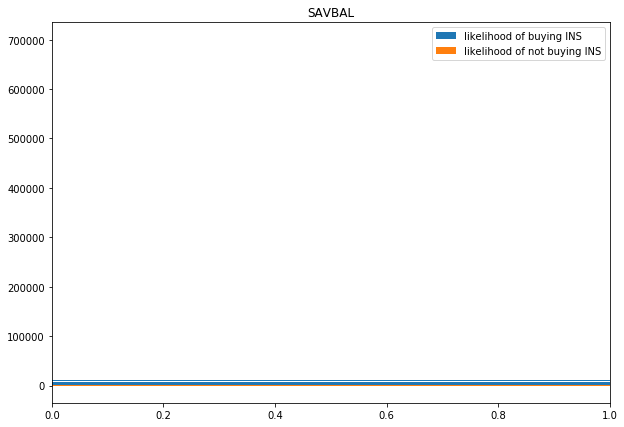

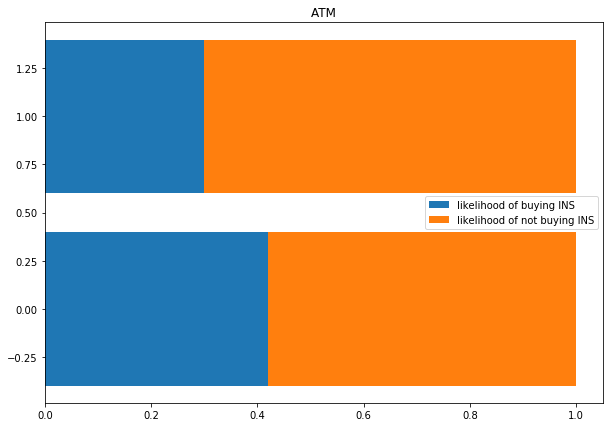

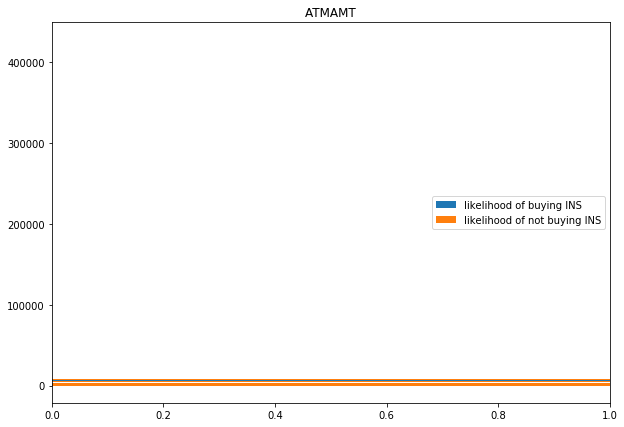

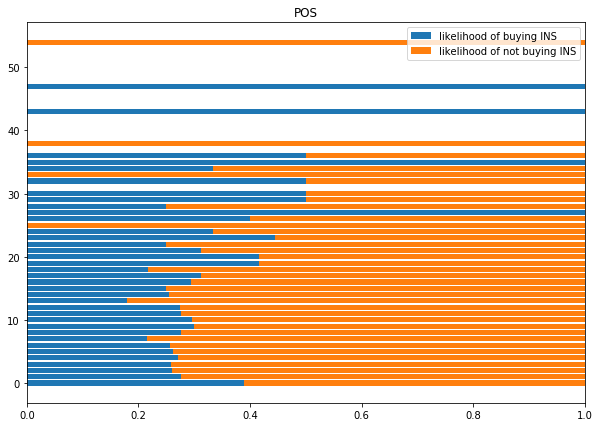

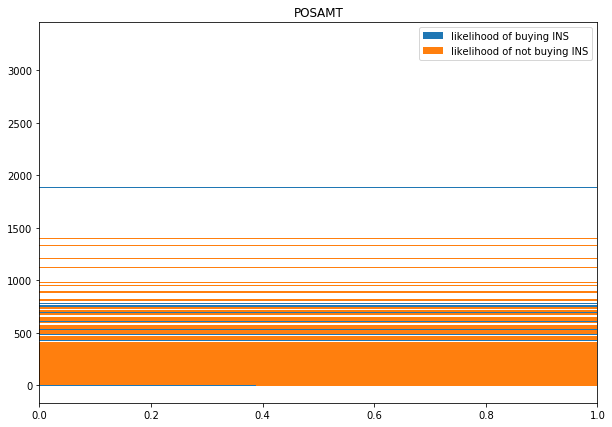

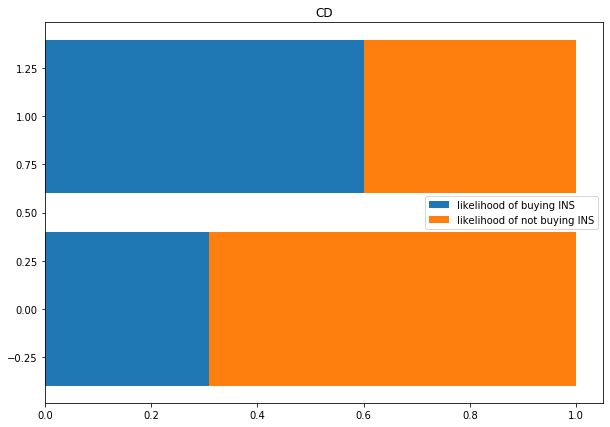

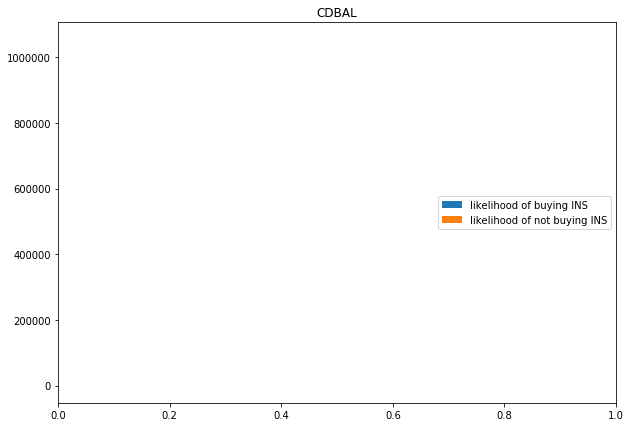

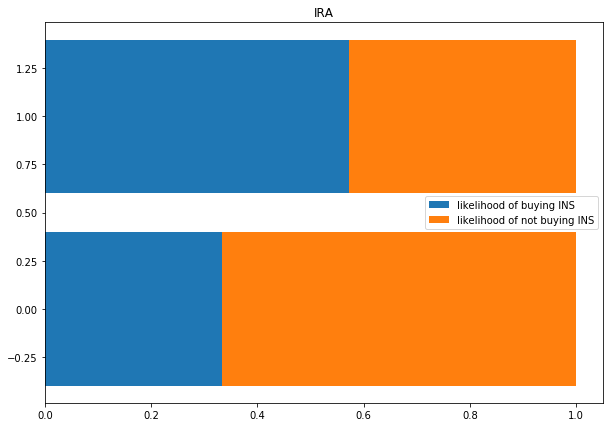

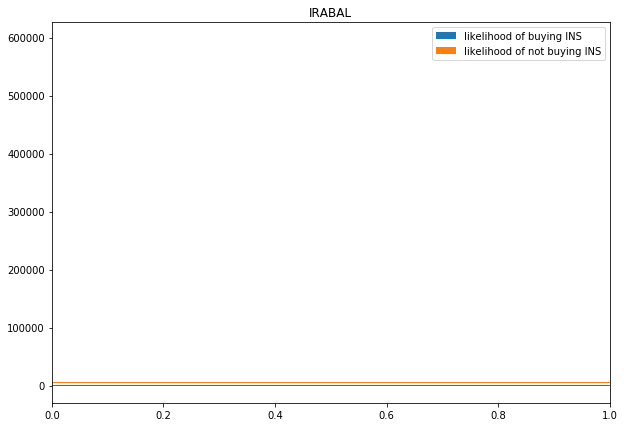

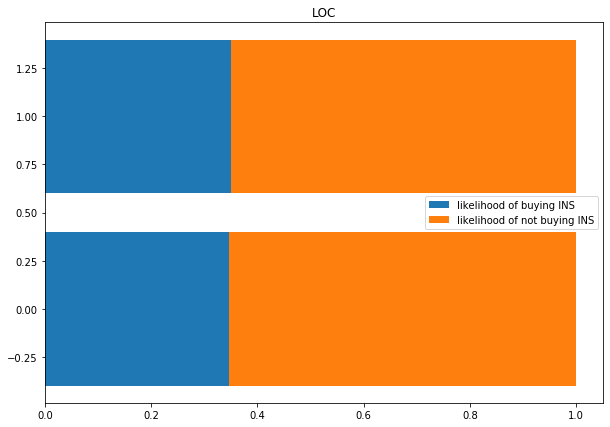

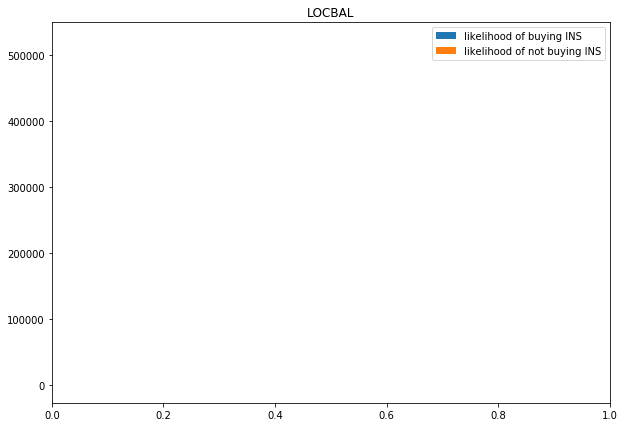

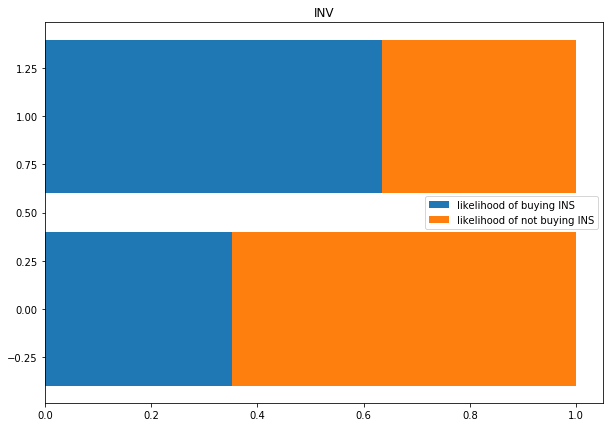

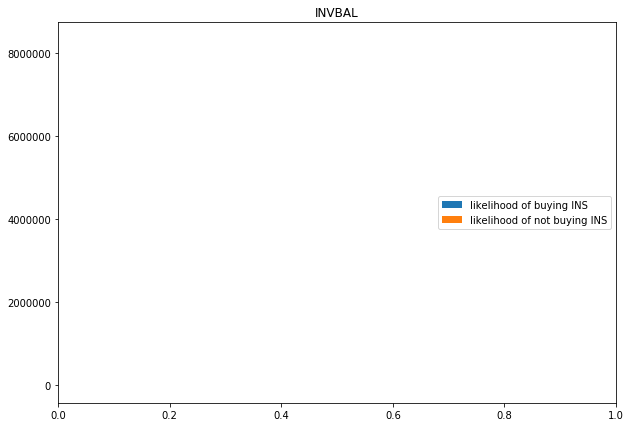

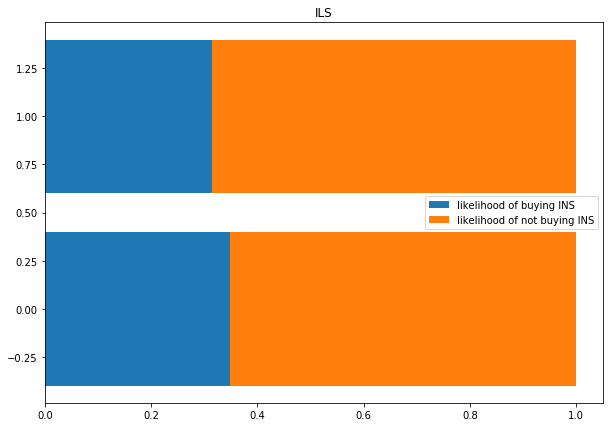

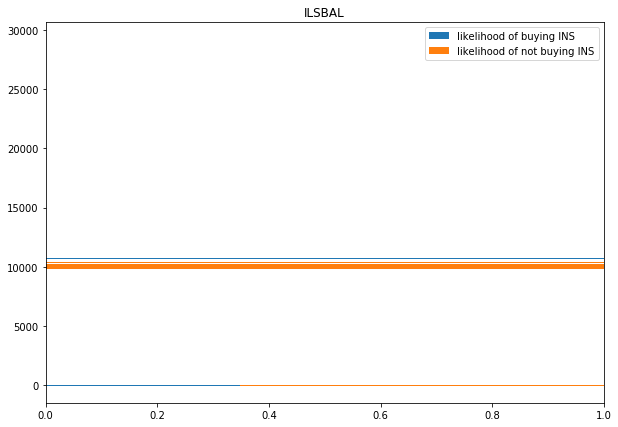

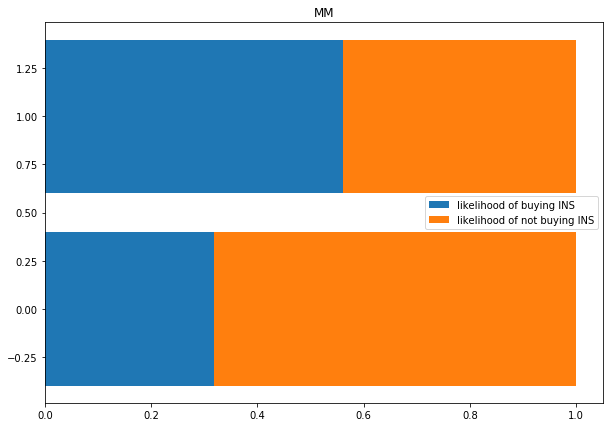

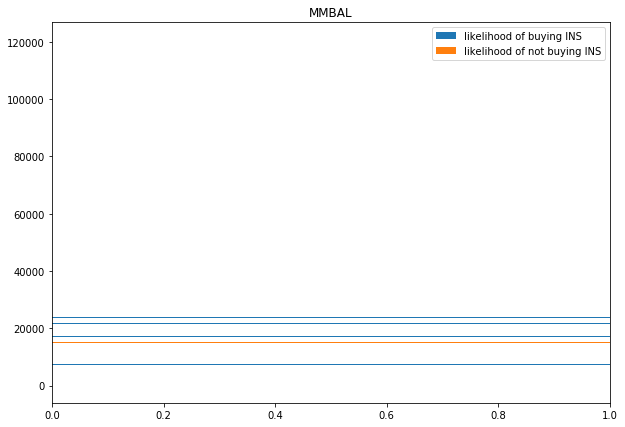

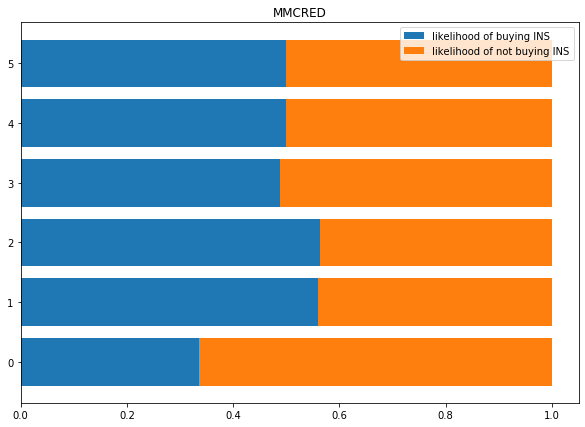

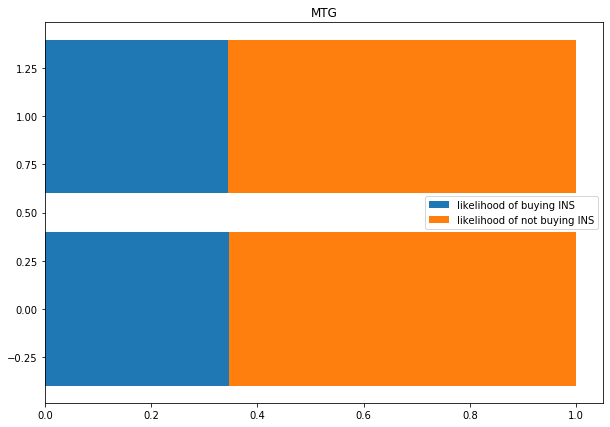

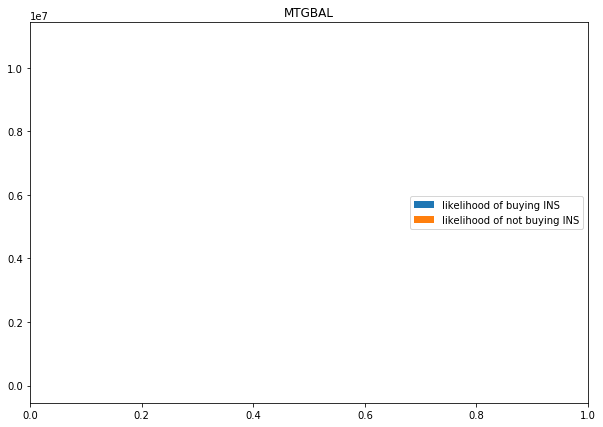

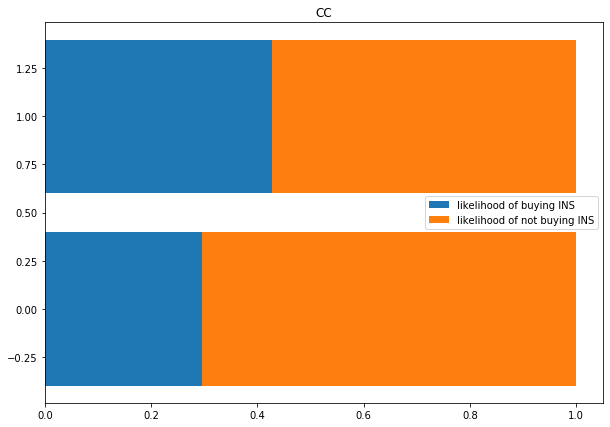

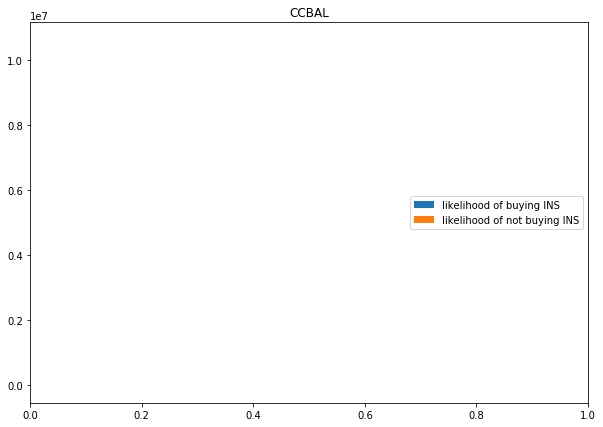

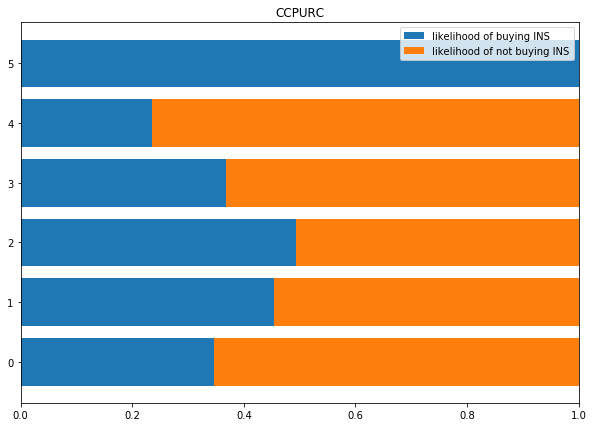

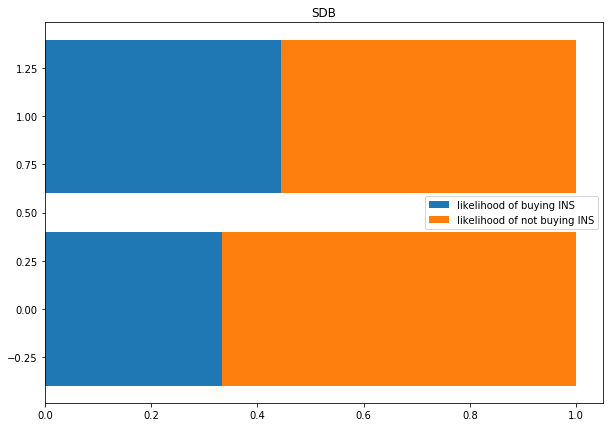

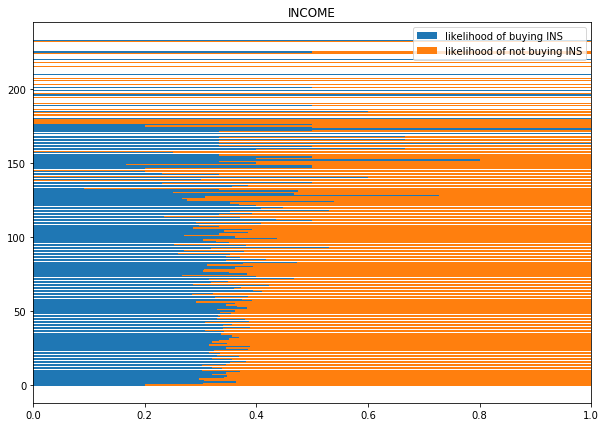

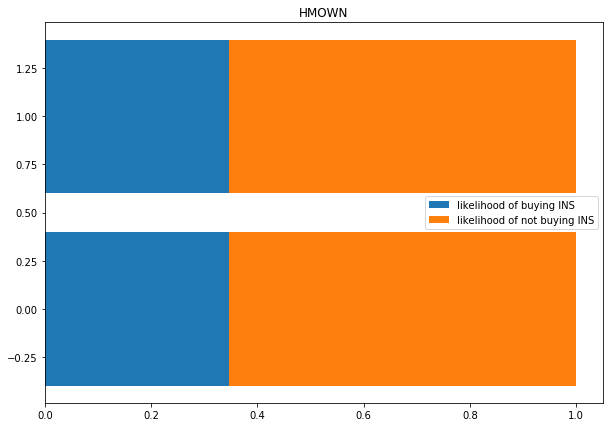

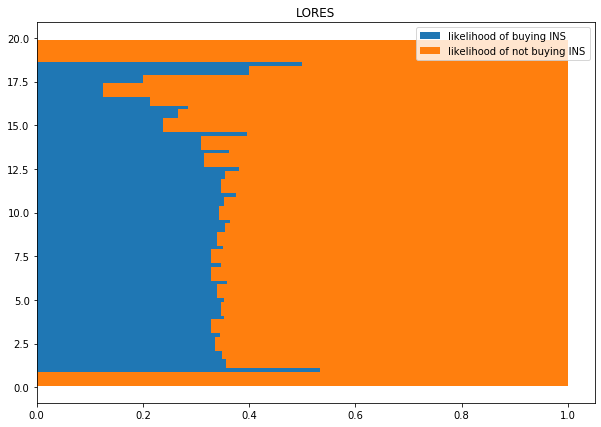

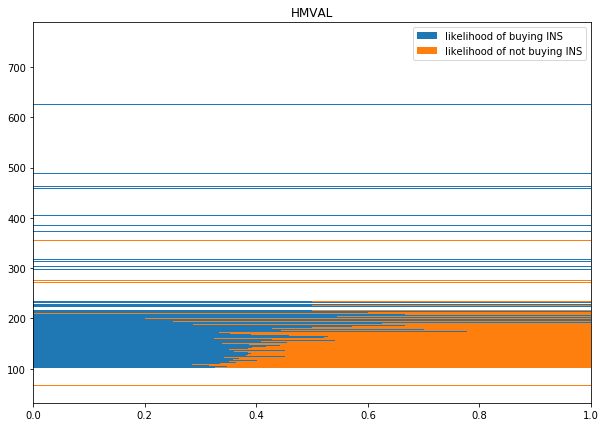

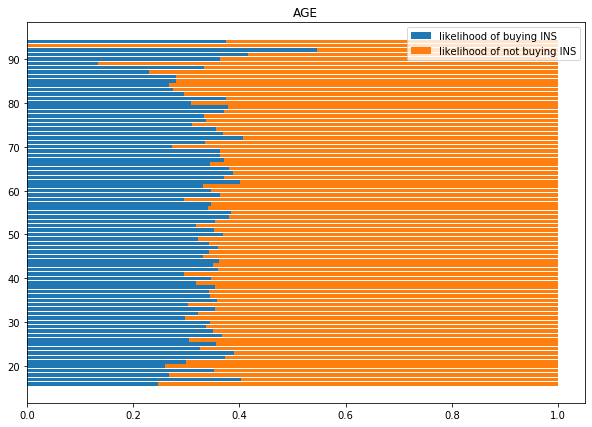

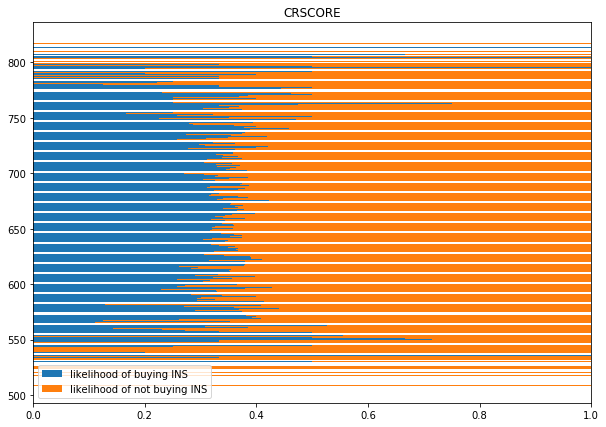

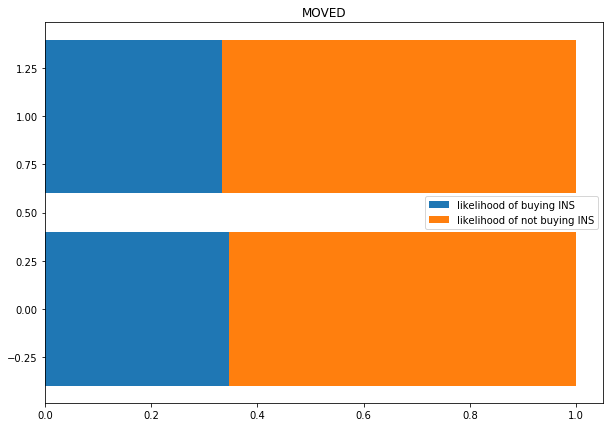

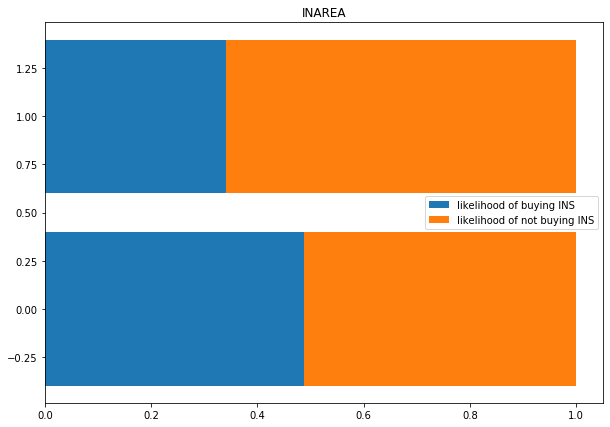

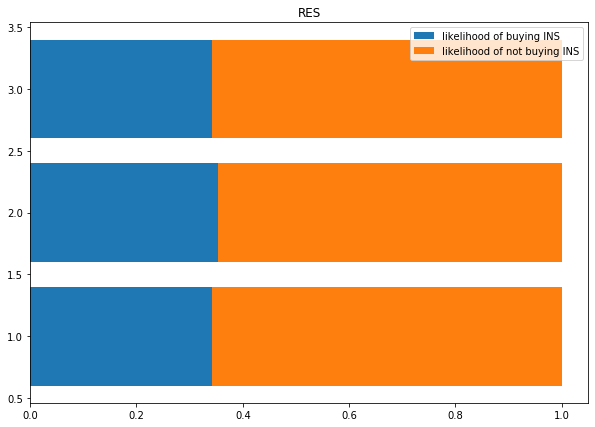

In [36]:
# Get count of INS for each col

for col in num_columns:
    totals = df.groupby(col)['INS'].count() # two columns are hierarchical
    pos_counts = df.groupby(col)['INS'].sum()

     # Use these to calculate the %-INS
    pos_pcts = pos_counts / totals
    neg_pcts = 1 - pos_pcts

     # Plot these on a stacked bar chart
    plt.figure(figsize=(10,7))
    plt.barh(pos_pcts.index, pos_pcts.values, label='likelihood of buying INS')
    plt.barh(neg_pcts.index, neg_pcts.values, label='likelihood of not buying INS',
    left=pos_pcts) # neg_pcts bars have their leftmost point where the pos_pcts end
    #plt.title(f'INS % by col (mean = {avg})')
    #plt.title(f'INS %'{}'.format(col))
    plt.title('{}'.format(col))
    plt.legend()
    plt.show()

### Network Analysis

In [ ]:
import networkx as nx

# Graph is undirected
G=nx.Graph()

In [ ]:
df=df.reset_index()
df

In [ ]:
df=df.rename(columns={'index': 'customer_id'})
df.head()

In [ ]:
items =['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA', 'INS', 'RES']

In [ ]:
from itertools import combinations
# Collapse to a series of lists: one list for each invoice/basket
data = df.groupby('customer_id').apply(lambda df: list(df[items]))
# Ignore baskets of length 1 - no connections
data = data[data.apply(lambda df:len(df) > 1)]

# Create a dictionary to hold edges
mydict = {}

for i in range(len(data)):
    # for every pair of items in a basket
    for j,k in combinations(data[i],2):
        # setdefault, and append a 1 for each time it is found
        mydict.setdefault((j,k),[]).append(1)
        
# Make a graph
G = nx.Graph()
# Add the edges if weight is greater than 20 - ie 20 transactions
_ = [G.add_edge(i[0], i[1], weight = len(j)) for i,j in mydict.items() if len(j) > 20];

In [ ]:
# How many nodes (products?)
len(G)

In [ ]:
# How many edges (co-purchases)?
len(G.edges)

In [ ]:
# Write out to gexf (Gephi format)
nx.write_gexf(G, 'retailbank.gexf')

In [ ]:
pd.Series(dict(G.degree)).nlargest(10).sort_values()

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities #modularity is community detection algorithms

clusters = greedy_modularity_communities(G)

print(f'The network has {len(clusters)} clusters.')

In [ ]:
list(G.neighbors('item'))

In [ ]:
list(nx.find_cliques(G))

In [ ]:
n_neighbors = len(neighbors)
n_neighbors

In [ ]:
item_dictionary[item] = n_neighbors 
item_dictionary 

### Modeling

In [ ]:
# Check missing values again
df.isna().sum(axis=0) 

In [ ]:
# Set up X (independent variables) and y (target variable)
X = df.drop('INS', axis=1)
y = df['INS']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

In [ ]:
# Check the class proportions to see if two classes are balanced
y.value_counts()/len(df)

In [ ]:
# Split the data into remainder and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The test set has {len(X_test)} data points.')

In [ ]:
# Instantiate the OneHotEncoder
#ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# Expects a 2D array
#BRANCH = pd.DataFrame(df['BRANCH'])
#encoded = ohe.fit_transform(BRANCH)
#encoded

# Convert from sparse matrix to dense
#dense_array = encoded.toarray()
#dense_array

# Put into a dataframe to get column names
#BRANCH_df = pd.DataFrame(dense_array, columns=['B4', 'B2', 'B3','B1','B5','B15','B16','B6','B7','B8','B14','B17','B9','B12','B18','B13','B19','B10','B11'], dtype=int)

# concatenate the dense array with our table
#new_df = pd.concat([BRANCH_df, df], axis=1)
# making sure our code works
#new_df

# dropping BRANCH
#new_df.drop(['BRANCH'], axis=1, inplace=True)

#dummy = pd.get_dummies(df['BRANCH'], drop_first=True) 
#dummy

# joining the dataframe with dummies to the orginal dataframe

#new_df = pd.concat([df,dummy], axis=1)
#new_df

**Logistic Regression**

In [ ]:
df.isna().sum(axis=0) 

In [ ]:
# Using pipeline and grid search to do Scale, Dimension Reduction and Hyperparameterization
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline for Logistic Regression 
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Try a range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l1 with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(random_state=1,n_jobs=-1)],
     'model__C': c_values}
]

In [ ]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=5)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

In [ ]:
fitted_logreg_gs.best_estimator_

In [ ]:
# Print the accuracies
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = fitted_logreg_gs.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
prob_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'])
prob_df.index=['Actual 0', 'Actual 1'] 
prob_df


     • Correctly predicted class 0: 3781
     • Incorrectly predicted class 0: 1359
     • Incorrectly predicted class 1: 437
     • Correctly predicted class 1: 876

In [ ]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Classification report for a threshold of default 0.5 \n')
print('Accuracy Score for Test data:', accuracy_score(y_test, y_pred))
print('Precision Score for Test data:', precision_score(y_test, y_pred))
print('Recall Score for Test data:', recall_score(y_test, y_pred))
print('F1 Score for Test data:', f1_score(y_test, y_pred))

**Conclusion:**

Recall : 39% of data points that our model correctly classified as class 1 among all the data points that belong to the class 1. That is low! 

Precision: 67% of data points that our model correctly classified as class 1 among the number of data points that we either correctly or incorrectly classified as class 1.
 


In [ ]:
# Get probabilities using the test set
probabilities = fitted_logreg_gs.predict_proba(X_test)

# Check
probabilities

In [ ]:
# Put it into a dataframe
prob_df = pd.DataFrame(probabilities, columns=['probability of being class 0', 'probability of being class 1'])
prob_df

In [ ]:
# Look at just the column for class 1
y_proba = probabilities[:, 1]

# Can put in a dataframe
pd.DataFrame(y_proba, columns=['probability of being class 1'])

So let's lower the threshold to increase recall and capture more members of the positive class.

In [ ]:
import numpy as np

# If the probability that a data point belongs to the positive class is greater than 0.2, it gets classified as 1; otherwise, it gets classified as 0
y_pred_20 = np.where(y_proba > 0.2, 1, 0)

print('Classification report for a threshold of 0.2 \n')
print(classification_report(y_test, y_pred_20))

In [ ]:
# Not necessary to calculate the accuracy score again? 
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

In [ ]:
# Save to file in the current working directory
joblib.dump(fitted_logreg_gs, 'my_gridsearch_object.pkl') 

In [ ]:
# Reload the model in a new variable
my_logistic_model = joblib.load('my_gridsearch_object.pkl') 


In [ ]:
log_reg_best_estimator = my_logistic_model.best_estimator_
log_reg_best_estimator

**Feature Importance:**

In [ ]:
coef_list = log_reg_best_estimator[2].coef_
coef_list

In [ ]:
column_list = X_train.columns
column_list 

In [ ]:
df_coefficient = pd.DataFrame({'coef':[-0.1075131 , -0.23187537,  0.41229112, -0.08529161,  0.02202301,
                                       -0.04861991, -0.13400231, -0.00746875, -0.00133274,  0.01781209,
                                       -0.10410809,  0.18156254,  0.26303811,  0.58869341, -0.08435858,
                                       0.22518169, -0.0865185 ,  0.10291171,  0.28557429,  0.03667905,
                                       0.10865924,  0.00278069, -0.04279744, -0.06322008,  0.08703227,
                                       0.01404941, -0.13306336,  0.05001498,  0.35425262, -0.11451773,
                                       -0.00156426, -0.0840228 , -0.09723534,  0.24226526,  0.1418048 ,
                                       0.01836527,  0.02461379, -0.00503777, -0.02843363,  0.04208871,
                                       0.05162131, -0.00301922,  0.00332264, -0.01357252, -0.00502926,
                                       0.01459073], 
                               'column':['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
                                       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
                                       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
                                       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
                                       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
                                       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA', 'RES']})

df_coefficient

In [ ]:
# Sort coefficient
df_coefficient.sort_values(by=['coef'], ascending=False)

In [ ]:
df_coefficient = pd.DataFrame(coef_list , column_list , columns=['coef', 'column'])
df_coefficient.sort_values(by=['coef'], ascending=False)
df_coefficient


Interpret coefficient and odds ratio:

The most six biggest coefficient belong to features SAVBAL, DDABAL, MM, CD, SAV and CC.
   
SAVBAL: With one unit increase in SAVBAL, a customer is 58.87% more likely to purchase an insurance product.

The most six smallest coefficient belong to DDA, CHECKS, ILS, MMBAL, ACCTAGE and PHONE.

DDA: With one unit increase in DDA, a customer is 23.19% less likely to purchase an insurance product.

In [ ]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

#my_KBest = SelectKBest(f_classif,k=5).fit(X_train, y_train)

#print(my_KBest.scores_)

#print(my_KBest.get_support())

#features = []
#for i in range(len(my_KBest.get_support())):
    #if my_KBest.get_support()[i] == True:
        #features.append(df.columns[i])
#features

### Improve model accuracy

In [ ]:
# Imbalanced classes
df['INS'].value_counts()

In [ ]:
# Downsampling
from sklearn.utils import resample
df_1 = df[df['INS']==df['INS'].value_counts().index[0]]
df_2 = df[df['INS']!=df['INS'].value_counts().index[0]]

df_down = resample(df_1, replace=True, n_samples=df['INS'].value_counts().values[1], random_state=42)

df_downsampled = pd.concat([df_down, df_2])

In [ ]:
df_downsampled['INS'].value_counts()

### Restart the process

In [ ]:
# Set up X (independent variables) and y (target variable)
X = df_downsampled.drop('INS', axis=1)
y = df_downsampled['INS']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

In [ ]:
# Split the data into remainder and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The test set has {len(X_test)} data points.')

In [ ]:
# Using pipeline and grid search to do Scale, Dimension Reduction and Hyperparameterization
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline for Logistic Regression 
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Try a range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l1 with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(random_state=1, n_jobs=-1)],
     'model__C': c_values},
    
    # l2 (default) with PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(random_state=1,n_jobs=-1)],
     'model__C': c_values}
]

In [ ]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=5)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

In [ ]:
# Print the accuracies
print(f"The best logistic regression's accuracy on the train set: {fitted_logreg_gs.score(X_train, y_train)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

**Random Forest**

In [ ]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('model', RandomForestClassifier())], memory=cachedir)

                    

# Parameter grid
rf_param_grid = [{'model': [RandomForestClassifier()],
                  'model__n_estimators': np.arange(1, 102, 10),
                  'model__max_depth' : [1]}]




# Make my GridSearchCV
random_forest_gs = GridSearchCV(estimator = my_pipeline, param_grid = rf_param_grid, cv=5, n_jobs=-1)


# Fit the log reg grid search
fitted_randomforest_gs = random_forest_gs.fit(X_train, y_train)


In [ ]:
fitted_randomforest_gs.best_estimator_

In [ ]:
# Print the accuracies
print(f"The best Random Forest's accuracy on the train set: {fitted_randomforest_gs.score(X_train, y_train)}")
print(f"The best Random Forest's accuracy on the test set: {fitted_randomforest_gs.score(X_test, y_test)}")

In [ ]:
# Confusion Matrix
#from sklearn.metrics import confusion_matrix

#y_pred = fitted_randomforest_gs.predict(X_train)
#cm = confusion_matrix(y_train, y_pred)
#prob_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1']) 
#prob_df.index=['Actual 0', 'Actual 1'] 
#prob_df

**SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
cachedir = mkdtemp()

my_pipeline = Pipeline([('scaling', StandardScaler()),('model', SVC())], memory=cachedir)

svc_param_grid = [
{'scaling':[StandardScaler()], 
 'model': [SVC()],                    
 #'dimensionality__n_components':[1,2,3,4,5],
 'model__C':np.power(10.0, np.arange(-1, 1))
 #'model__kernel':['rbf','linear','sigmoid'],
 #'model__gamma':[1, 10, 100]}

}]


# Instantiate the SVC grid search
svc_gs = GridSearchCV(my_pipeline, param_grid=svc_param_grid, cv=5,  verbose=5)

# Fit the SVC grid search
fitted_svc_gs = svc_gs.fit(X_train, y_train)

In [ ]:
fitted_svc_gs.best_estimator_

In [ ]:
# Print the accuracies
print(f"The best SVC's accuracy on the train set: {fitted_svc_gs.score(X_train, y_train)}")
print(f"The best SVC's accuracy on the test set: {fitted_svc_gs.score(X_test, y_test)}")

**KNN**

In [ ]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline and put placeholders
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

# Parameter grid
knn_param_grid = [

    {'scaler': [None, StandardScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'model__n_neighbors': (np.arange(1, 30)),
     'model': [KNeighborsClassifier(n_jobs = -1)]}
]

# Instantiate the random forest grid search
knn_gs = GridSearchCV(my_pipeline, param_grid=knn_param_grid, cv=5, verbose=5)

# Fit the log reg grid search
knn_gs = knn_gs.fit(X_train, y_train)

In [ ]:
knn_gs.best_estimator_

In [ ]:
# Print the accuracies
print(f"The best KNN's accuracy on the train set: {knn_gs.score(X_train, y_train)}")
print(f"The best KNN's accuracy on the test set: {knn_gs.score(X_test, y_test)}")

#### Plot ROC curves

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate models
model_list = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]



fpr_list = []
tpr_list = []
thresholds_list = []
auc_list = []

# We've splitted data and instantiated models. 
# The rest procedures of plotting Roc and calculate AUC score for different classifiers are same.

for model in model_list:
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities (using predict_proba, NOT .predict!)
    y_proba = model.predict_proba(X_test)[:,1]  # calaulate probability scores of each data point in index 1 column
                                                # which correspond to values in class 1 column

    # Generate the FPR and TPR and thresholds
    # Use roc_curve function + AUC
    fprs, tprs, thresholds = roc_curve(y_test, y_proba) #plug probability score into roc_curve to get FPR,TPR,thresholds
    auc = roc_auc_score(y_test, y_proba)
    
    # Append these to the lists
    thresholds_list.append(thresholds)
    fpr_list.append(fprs)
    tpr_list.append(tprs)
    auc_list.append(auc)

In [ ]:
# Plot
model_names = ['logit', 'knn', 'tree']

plt.figure(figsize=(8, 8))
for i in range(0, 3):
    plt.plot(fpr_list[i], tpr_list[i], label=model_names[i] + ' ' + str(np.round(auc_list[i],3)), marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()



In [ ]:
model_comparsion = pd.DataFrame({'Model':['Logistic Regression','Random Forest','KNN'], 
                                'Accuracy':[0.722, 0.666, 0.736],
                                'AUC': [0.744, 0.789, 0.730]})
model_comparsion